In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
train = pd.read_csv('data/fashion-mnist_train.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

This is a balanced data.

In [6]:
test = pd.read_csv('data/fashion-mnist_test.csv')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Scaling:<br>
Why: Helps the model converge faster by scaling pixel values to a smaller range (e.g., 0-1 or -1 to 1).

In [7]:
x_train = train.iloc[:,1:]/255

y_train = train.iloc[:,0]

x_test= test.iloc[:,1:]/255

y_test= test.iloc[:,0]

Splitting the training data into train and val datasets.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [10]:
x_train.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 48572, Length: 784, dtype: float64

Let's visualize some of the data

In [11]:
import matplotlib.pyplot as plt

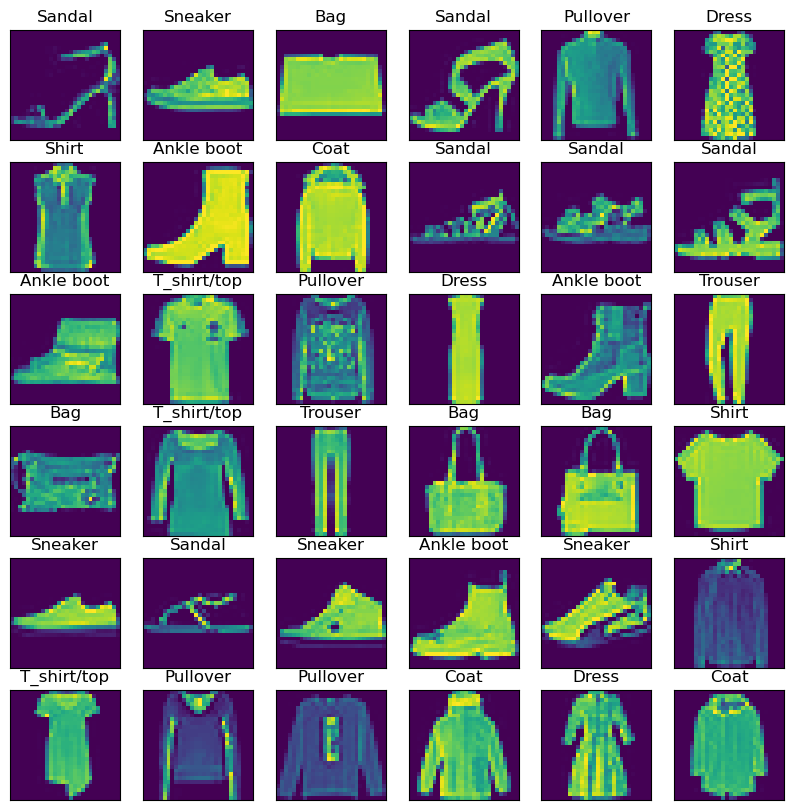

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.iloc[i].values.reshape((28,28)))
    label_index = int(y_train.iloc[i])
    plt.title(class_names[label_index])
plt.show()

Some questions that popped in my mind when I started working with CNN<br>
- input_shape of images like image width and height?<br>
ans: if the image is greyscale then we have 1 colour channel, if the image is coloured, then we have 3 coloured channels - which are Red, Green, Blue.<br>
- Does the CNN only accept the fixed input shapes?<br>
ans: Yes, it accepts only fixed input sizes. why?<br>
- what is pooling?<br>
Ans: Downsampling the feature map.<br>
- what is max pooling?<br>
Ans: From the feature map, considering the window size and stride size. As, we move through the windows, we pick the maximum number in each window. <br>
- why should we use pooling?<br>
Ans: the advantages of pooling are reduced computational cost and translation invariance<br>
- why should we flatten out the tensors and use dense layers?<br>
Ans: As the output is a classification problem, we<br>
- why should we use softmax for multiclass classification and cross entropy loss?<br>

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam

num_classes = 10
epochs = 20

In [14]:
import numpy as np

# Convert DataFrame to NumPy array
X_train = x_train.to_numpy()
print(type(X_train))# Or use .values for older Pandas versions
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, height, width, channels)

# Similarly for X_test
X_test = x_test.to_numpy()
X_test = X_test.reshape(-1, 28, 28, 1)

X_val = x_val.to_numpy()
X_val = X_val.reshape(-1, 28, 28, 1)

<class 'numpy.ndarray'>


In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2, strides = 2) ,# down sampling the output instead of 28*28 it is 14*14
    Conv2D(filters=64,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2, strides = 2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dropout(0.5), #adding dropout to reduce overfitting.
    Dense(10,activation = 'softmax')
    
])

In [20]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', 
                  optimizer=Adam(learning_rate=0.001),
                  metrics =['accuracy'])

In [21]:
history = cnn_model.fit(
    X_train,
    y_train,
    epochs=75,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5179 - loss: 1.2980 - val_accuracy: 0.8218 - val_loss: 0.4909
Epoch 2/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7144 - loss: 0.7546 - val_accuracy: 0.8426 - val_loss: 0.4245
Epoch 3/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7538 - loss: 0.6487 - val_accuracy: 0.8606 - val_loss: 0.3749
Epoch 4/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7722 - loss: 0.5949 - val_accuracy: 0.8685 - val_loss: 0.3629
Epoch 5/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7833 - loss: 0.5665 - val_accuracy: 0.8763 - val_loss: 0.3439
Epoch 6/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7973 - loss: 0.5310 - val_accuracy: 0.8794 - val_loss: 0.3296
Epoch 7/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8027 - loss: 0.5116 - val_accuracy: 0.8861 - val_loss: 0.3149
Epoch 8/75
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8106 - loss: 0.4952

Text(0.5, 1.0, 'Train - Accuracy')

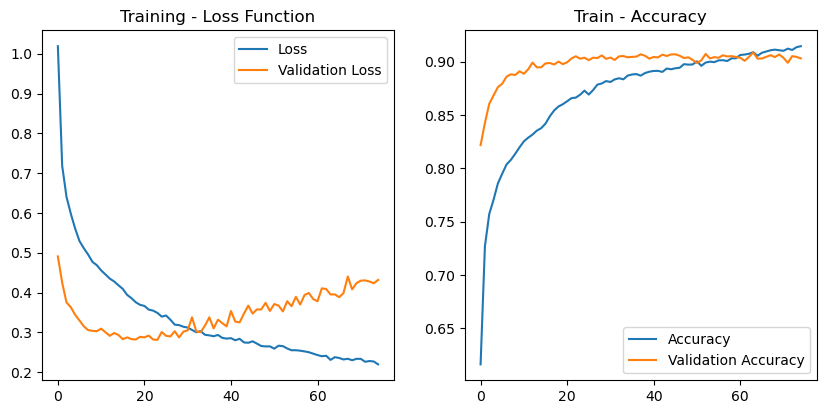

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label=' Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label=' Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')


Predictions

In [28]:
X_test = x_test.to_numpy()
X_test = X_test.reshape(-1, 28, 28, 1) 

In [33]:
pred = cnn_model.predict(X_test) # this gives you the list of probabilities for each class and each input
pred_test = np.argmax(pred, axis = 1) # this gives the index where the probability is maximum
pred_test #so, this will be an array of indices/classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0, 1, 2, ..., 8, 8, 1])

In [35]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred_test))

Accuracy: 0.9086


In [34]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.80      0.84      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.88      0.85      0.86      1000
     Class 3       0.93      0.90      0.91      1000
     Class 4       0.84      0.88      0.86      1000
     Class 5       0.98      0.99      0.98      1000
     Class 6       0.71      0.78      0.74      1000
     Class 7       0.97      0.95      0.96      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
cnn_model.predict(X_test) 

AttributeError: 'Sequential' object has no attribute 'predict_classes'